In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.utils as vision_utils
import torch.utils.data as data
import torch.nn.functional as functional
import torch.optim as optim

import pytorch_lightning as ptl
import torchmetrics as metrics
import pytorch_lightning.callbacks as callbacks

import einops

import models
import mnist_vit

%reload_ext autoreload
%autoreload 2

In [2]:
ptl.seed_everything(42, workers=True)

Global seed set to 42


42

In [3]:
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.1307, 0.3081)])

mnist_train = datasets.MNIST(".data", download=True, train=True, transform=mnist_transform)
mnist_val = datasets.MNIST(".data", download=True, train=False, transform=mnist_transform)

In [4]:
patch_size = 4
n_layers = 4
n_heads = 6
token_size = 64

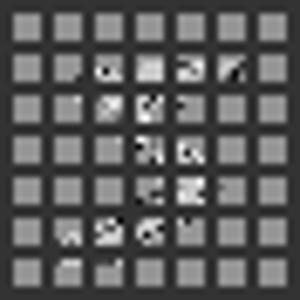

In [5]:
patches = einops.rearrange(mnist_train[0][0], "c (s1 h) (s2 w) -> (s1 s2) c h w", h=patch_size, w = patch_size)
transforms.ToPILImage()(vision_utils.make_grid(patches, nrow=28 // patch_size, pad_value=0.2)).resize((300, 300))

In [6]:
mnist_vit = mnist_vit.MNIST_ViT(mnist_train, mnist_val, patch_size=patch_size, n_layers=n_layers, n_heads=n_heads, token_size=token_size)

In [7]:
lr_monitor = callbacks.LearningRateMonitor()
early_stop = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.005, patience=3)
trainer = ptl.Trainer(gpus=1, callbacks=[lr_monitor, early_stop])

trainer.fit(mnist_vit)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params
------------------------------------------------
0 | train_acc | Accuracy          | 0     
1 | val_acc   | Accuracy          | 0     
2 | model     | VisionTransformer | 536 K 
------------------------------------------------
536 K     Trainable params
0         Non-trainable params
536 K     Total params
2.146     Total estimated model params size (MB)


Global seed set to 42


Epoch 15: 100%|██████████| 700/700 [01:13<00:00,  9.50it/s, loss=0.0978, v_num=5, train_loss=0.144, train_acc=0.960, val_loss=0.0922, val_acc=0.971] 
